# Notebook for demonstrating the use of beeswarms for CIU (and other) visualisation.

Contrastive explanations answer questions such as "Why alternative A rather than B" or "Why not alternative B rather than A". In classification tasks, these questions might rather be of the kind "Why is this a cat and not a dog?".

CIU can provide answers to such questions becasue any value in the range [0,1] can be used for neutral.CU, including CU values of an instance to compare with that then provide the "reference value" to compare against. 

First some basic imports.

In [1]:
#%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
import ciu as ciu
from ciu import ciuplots
from ciu.CIU import contrastive_ciu

# Iris data set

We get LDA model, an instance to explain and the CIU object for them.

In [2]:
from ciu_tests import iris_lda

np.random.seed(24)
CIU_iris, iris_lda_model, iris_instance = iris_lda.get_iris_test()

Then...

In [3]:
CIUres1 = CIU_iris.explain(iris_instance, output_inds=1)
CIUres2 = CIU_iris.explain(iris_instance, output_inds=2)
display(CIUres1)
display(CIUres2)
contrastive = contrastive_ciu(CIUres1, CIUres2)
display(contrastive)

,CI,CU,Cinfl,outname,outval,feature,ymin,ymax,inputs,invals,neutralCU,target_concept,target_inputs
s_length,0.988707,0.814136,0.310589,versicolor,0.816231,s_length,1.128877e-02,0.999995,[0],[2.0],0.5,None,None
s_width,0.881025,0.795644,0.260470,versicolor,0.816231,s_width,1.152488e-01,0.996274,[1],[3.2],0.5,None,None
p_length,0.999546,0.816601,0.316458,versicolor,0.816231,p_length,3.025695e-17,0.999546,[2],[1.8],0.5,None,None
p_width,0.999996,0.816231,0.316230,versicolor,0.816231,p_width,3.002736e-06,0.999999,[3],[2.4],0.5,None,None


,CI,CU,Cinfl,outname,outval,feature,ymin,ymax,inputs,invals,neutralCU,target_concept,target_inputs
s_length,0.183769,1.000000,0.091885,virginica,0.183769,s_length,9.971964e-12,0.183769,[0],[2.0],0.5,None,None
s_width,0.881239,0.204549,-0.260363,virginica,0.183769,s_width,3.512655e-03,0.884751,[1],[3.2],0.5,None,None
p_length,0.999546,0.183399,-0.316458,virginica,0.183769,p_length,4.537308e-04,1.000000,[2],[1.8],0.5,None,None
p_width,0.459932,0.399558,-0.046197,virginica,0.183769,p_width,2.658730e-20,0.459932,[3],[2.4],0.5,None,None


s_length   -0.183765
s_width     0.520769
p_length    0.632915
p_width     0.416672
dtype: float64

Then the explanation:

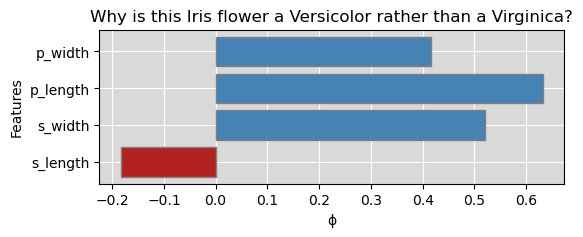

In [4]:
ciuplots.plot_contrastive(CIUres1, CIUres2, main="Why is this Iris flower a Versicolor rather than a Virginica?", figsize=(6,2))

The question can also be asked the other way around:

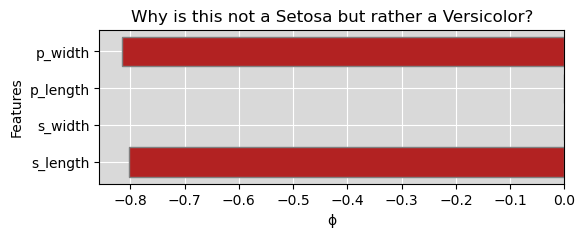

In [5]:
CIUres2 = CIU_iris.explain(iris_instance, output_inds=0)
ciuplots.plot_contrastive(CIUres2, CIUres1, main="Why is this not a Setosa but rather a Versicolor?", figsize=(6,2))

## Boston housing

Start by loading the data and training a GB model on it. Also create CIU object and get CIU values for all the instances of interest. For the whole dataset this will typically take over a minute. 

In [6]:
from sklearn.model_selection import train_test_split

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_target = raw_df.values[1::2, 2]
boston_data = pd.DataFrame(data)
boston_data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
np.random.seed(26) # We want to always get the same Random Forest model here.
X_train, X_test, y_train, y_test = train_test_split(boston_data, boston_target, test_size=0.3, random_state=123)
boston_xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
boston_xgb_model.fit(X_train,y_train)
out_minmaxs = pd.DataFrame({'mins': [min(y_train)], 'maxs': max(y_train)})
out_minmaxs.index = ['Price']
CIU_boston = ciu.CIU(boston_xgb_model.predict, ['Price'], data=X_train, out_minmaxs=out_minmaxs)


In [7]:
inst1 = X_test.iloc[[2]]
inst2 = X_test.iloc[[4]]
CIUres1 = CIU_boston.explain(inst1)
CIUres2 = CIU_boston.explain(inst2)
display(CIUres1)
display(CIUres2)
contrastive = contrastive_ciu(CIUres1, CIUres2)
display(contrastive)

,CI,CU,Cinfl,outname,outval,feature,ymin,ymax,inputs,invals,neutralCU,target_concept,target_inputs
CRIM,0.007526,1.000000,0.003763,Price,32.130909,CRIM,31.792238,32.130909,[0],[0.03578],0.5,None,None
ZN,0.017614,0.562698,0.001104,Price,32.130909,ZN,31.684902,32.477524,[1],[20.0],0.5,None,None
INDUS,0.046109,1.000000,0.023055,Price,32.130909,INDUS,30.055994,32.130909,[2],[3.33],0.5,None,None
CHAS,0.000000,0.000000,-0.000000,Price,32.130909,CHAS,32.130909,32.130909,[3],[0.0],0.5,None,None
NOX,0.025340,1.000000,0.012670,Price,32.130909,NOX,30.990591,32.130909,[4],[0.4429],0.5,None,None
RM,0.074985,1.000000,0.037493,Price,32.130909,RM,28.756565,32.130909,[5],[7.82],0.5,None,None
AGE,0.013894,1.000000,0.006947,Price,32.130909,AGE,31.505692,32.130909,[6],[64.5],0.5,None,None
DIS,0.063518,0.922246,0.026820,Price,32.130909,DIS,29.494846,32.353153,[7],[4.6947],0.5,None,None
RAD,0.024754,1.000000,0.012377,Price,32.130909,RAD,31.016977,32.130909,[8],[5.0],0.5,None,None
TAX,0.037765,1.000000,0.018882,Price,32.130909,TAX,30.431486,32.130909,[9],[216.0],0.5,None,None


,CI,CU,Cinfl,outname,outval,feature,ymin,ymax,inputs,invals,neutralCU,target_concept,target_inputs
CRIM,0.016477,0.000000,-0.008239,Price,28.801001,CRIM,28.801001,29.542480,[0],[0.0315],0.5,None,None
ZN,0.017232,1.000000,0.008616,Price,28.801001,ZN,28.025560,28.801001,[1],[95.0],0.5,None,None
INDUS,0.026466,1.000000,0.013233,Price,28.801001,INDUS,27.610043,28.801001,[2],[1.47],0.5,None,None
CHAS,0.000000,0.000000,-0.000000,Price,28.801001,CHAS,28.801001,28.801001,[3],[0.0],0.5,None,None
NOX,0.021159,0.790618,0.006149,Price,28.801001,NOX,28.048223,29.000360,[4],[0.403],0.5,None,None
RM,0.074985,0.322703,-0.013295,Price,28.801001,RM,27.712090,31.086432,[5],[6.975],0.5,None,None
AGE,0.021635,1.000000,0.010818,Price,28.801001,AGE,27.827423,28.801001,[6],[15.3],0.5,None,None
DIS,0.050681,0.076359,-0.021470,Price,28.801001,DIS,28.626854,30.907480,[7],[7.6534],0.5,None,None
RAD,0.024887,1.000000,0.012443,Price,28.801001,RAD,27.681095,28.801001,[8],[3.0],0.5,None,None
TAX,0.039942,1.000000,0.019971,Price,28.801001,TAX,27.003613,28.801001,[9],[402.0],0.5,None,None


CRIM       0.007526
ZN        -0.007703
INDUS      0.000000
CHAS       0.000000
NOX        0.005306
RM         0.050787
AGE        0.000000
DIS        0.053729
RAD        0.000000
TAX        0.000000
PTRATIO   -0.015973
B          0.023876
LSTAT      0.000000
dtype: float64

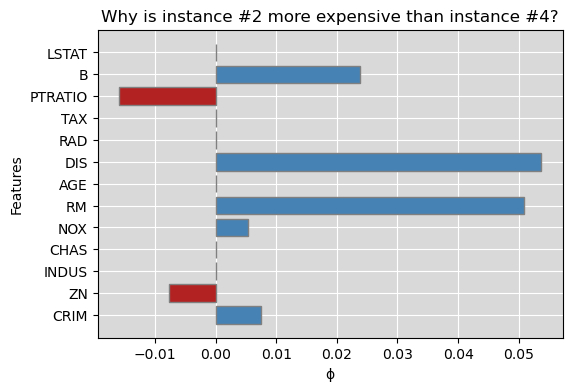

In [8]:
ciuplots.plot_contrastive(CIUres1, CIUres2, main="Why is instance #2 more expensive than instance #4?")

## Ames housing

We next produce a contrastive explanation for why Ames instance #433 ($477919, previous Figures) is predicted to be more expensive than instance #1638 ($439581). Contrastive values are in the range [−1, 1] by definition, so the differences between these two Ames instances are rather small. The two instances have been selected to be quite similar because contrastive questions/explanations are often asked as "why did you buy that car, isn't that one just as good or better?". 